# Saving and Loading Models

In this notebook, I'll show you how to save and load models with PyTorch. This is important because you'll often want to load previously trained models to use in making predictions or to continue training on new data.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

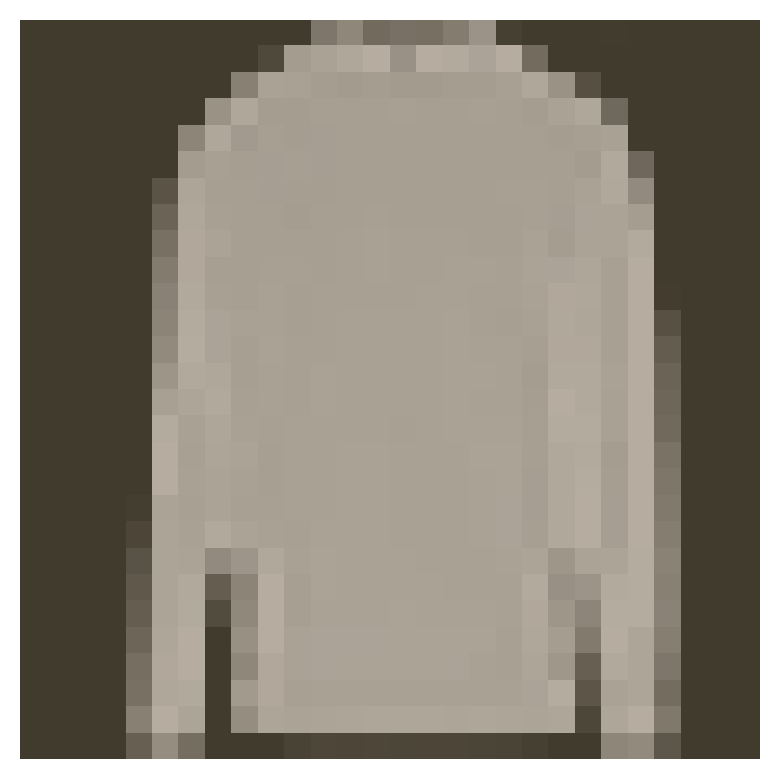

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Train a network

To make things more concise here, I moved the model architecture and training code from the last part to a file called `fc_model`. Importing this, we can easily create a fully-connected network with `fc_model.Network`, and train the network using `fc_model.train`. I'll use this model (once it's trained) to demonstrate how we can save and load models.

In [4]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.699..  Test Loss: 0.951..  Test Accuracy: 62.2%
Epoch: 1/2..  Training Loss: 1.007..  Test Loss: 0.775..  Test Accuracy: 68.8%
Epoch: 1/2..  Training Loss: 0.834..  Test Loss: 0.682..  Test Accuracy: 73.7%
Epoch: 1/2..  Training Loss: 0.803..  Test Loss: 0.665..  Test Accuracy: 74.6%
Epoch: 1/2..  Training Loss: 0.766..  Test Loss: 0.613..  Test Accuracy: 76.0%
Epoch: 1/2..  Training Loss: 0.709..  Test Loss: 0.593..  Test Accuracy: 77.0%
Epoch: 1/2..  Training Loss: 0.682..  Test Loss: 0.572..  Test Accuracy: 77.8%
Epoch: 1/2..  Training Loss: 0.657..  Test Loss: 0.581..  Test Accuracy: 77.2%
Epoch: 1/2..  Training Loss: 0.693..  Test Loss: 0.568..  Test Accuracy: 78.1%
Epoch: 1/2..  Training Loss: 0.653..  Test Loss: 0.550..  Test Accuracy: 79.5%
Epoch: 1/2..  Training Loss: 0.640..  Test Loss: 0.544..  Test Accuracy: 78.7%
Epoch: 1/2..  Training Loss: 0.625..  Test Loss: 0.541..  Test Accuracy: 81.0%
Epoch: 1/2..  Training Loss: 0.600..  Test Loss: 0.5

## Saving and loading networks

As you can imagine, it's impractical to train a network every time you need to use it. Instead, we can save trained networks then load them later to train more or use them for predictions.

The parameters for PyTorch networks are stored in a model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers.

In [6]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


The simplest thing to do is simply save the state dict with `torch.save`. For example, we can save it to a file `'checkpoint.pth'`.

In [9]:
torch.save(model.state_dict(), 'checkpoint.pth')

Then we can load the state dict with `torch.load`.

In [10]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


/var/folders/21/25m9bdqj7pv3mhbdjmv2z1w40000gn/T/ipykernel_66259/3138749330.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('checkpoint.pth')


–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### What is the `state_dict`?

The `state_dict` (state dictionary) is a simple Python dictionary that maps each layer of your model to its learnable parameters (weights and biases).

*   **It's NOT the model's architecture.** It doesn't know about your `forward()` method or how layers are connected.
*   **It's ONLY the learned weights and biases.** Think of it as a snapshot of all the "knowledge" your model has gained during training.

A `state_dict` looks like this:

```python
{
    'fc1.weight': tensor([...]),
    'fc1.bias':   tensor([...]),
    'fc2.weight': tensor([...]),
    'fc2.bias':   tensor([...]),
    # ... and so on for all layers
}
```

---

### `torch.load()` vs. `model.load_state_dict()`

These two functions perform two **separate and essential steps**:

1.  **`torch.load('filepath')`**: This function **reads the file from your disk**. It un-pickles the file and loads the saved object into memory. In this case, the object it loads is the `state_dict` dictionary.
    *   **Analogy**: You're opening a blueprint file on your computer. You can now see the blueprint, but it hasn't been used to build anything yet.

2.  **`model.load_state_dict(state_dict)`**: This function takes the dictionary (the `state_dict`) and **loads its contents *into* your model instance**. It goes through the dictionary, key by key, and copies the saved weights and biases into the corresponding layers of the model you've defined.
    *   **Analogy**: You're handing the blueprint to a construction crew, who then build the house according to its specifications.

### Why Do You Need Both? The Workflow

Here is the standard, recommended workflow that shows why both are necessary:

```python
# 1. First, you must define and create an instance of your model architecture.
#    The model is like an empty shell with randomly initialized weights.
model = MyNetwork() 

# 2. Use torch.load() to get the dictionary of saved weights from the file.
#    This brings the "knowledge" from disk into your script.
state_dict = torch.load('checkpoint.pth')

# 3. Use model.load_state_dict() to populate your empty model shell
#    with the saved weights.
model.load_state_dict(state_dict)
```

### The Key Takeaway: Flexibility

Separating these two steps is the most flexible and recommended approach because it decouples the **model's weights** from its **architecture code**.

By just saving the `state_dict`, you can:
*   Load the weights into a slightly different model architecture.
*   Analyze the weights without needing the original model's Python file.
*   Share your trained model weights easily without bundling all the code.

While you *can* save the entire model object (`torch.save(model, 'entire_model.pth')`), it's less flexible and can break if you refactor your code. Saving the `state_dict` is the industry standard.

And to load the state dict in to the network, you do `model.load_state_dict(state_dict)`.

---

In [11]:
model.load_state_dict(state_dict)

<All keys matched successfully>

Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. If I create a model with a different architecture, this fails.

In [ ]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

This means we need to rebuild the model exactly as it was when trained. Information about the model architecture needs to be saved in the checkpoint, along with the state dict. To do this, you build a dictionary with all the information you need to compeletely rebuild the model.

In [12]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

Now the checkpoint has all the necessary information to rebuild the trained model. You can easily make that a function if you want. Similarly, we can write a function to load checkpoints. 

In [13]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [14]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


/var/folders/21/25m9bdqj7pv3mhbdjmv2z1w40000gn/T/ipykernel_66259/3142072770.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)
